In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/cardio_train.csv", sep=';')
data.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
data['cardio'].value_counts()

,count
cardio,
0,35021
1,34979


In [ ]:
# from sklearn.preprocessing import StandardScaler
# scale=StandardScaler()
# data.drop('id', axis=1, inplace=True)
# d=data.iloc[:,0:11]
# x=scale.fit_transform(d)
# df=pd.DataFrame(x,columns=d.columns)
# df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,-0.436062,1.364055,0.443452,-0.847873,-0.122182,-0.088238,-0.539322,-0.39572,-0.310879,-0.238384,0.494167
1,0.307686,-0.733108,-1.018168,0.749831,0.072610,-0.035180,2.400793,-0.39572,-0.310879,-0.238384,0.494167
2,-0.247997,-0.733108,0.078047,-0.708942,0.007679,-0.141297,2.400793,-0.39572,-0.310879,-0.238384,-2.023607
3,-0.748152,1.364055,0.565254,0.541435,0.137541,0.017879,-0.539322,-0.39572,-0.310879,-0.238384,0.494167
4,-0.808543,-0.733108,-1.018168,-1.264666,-0.187113,-0.194356,-0.539322,-0.39572,-0.310879,-0.238384,-2.023607


In [ ]:
car=data.iloc[:,-1]
data.drop('id', axis=1, inplace=True)
df=data.iloc[:,0:11]
df.head(5)
#df['cardio']=car
#df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0


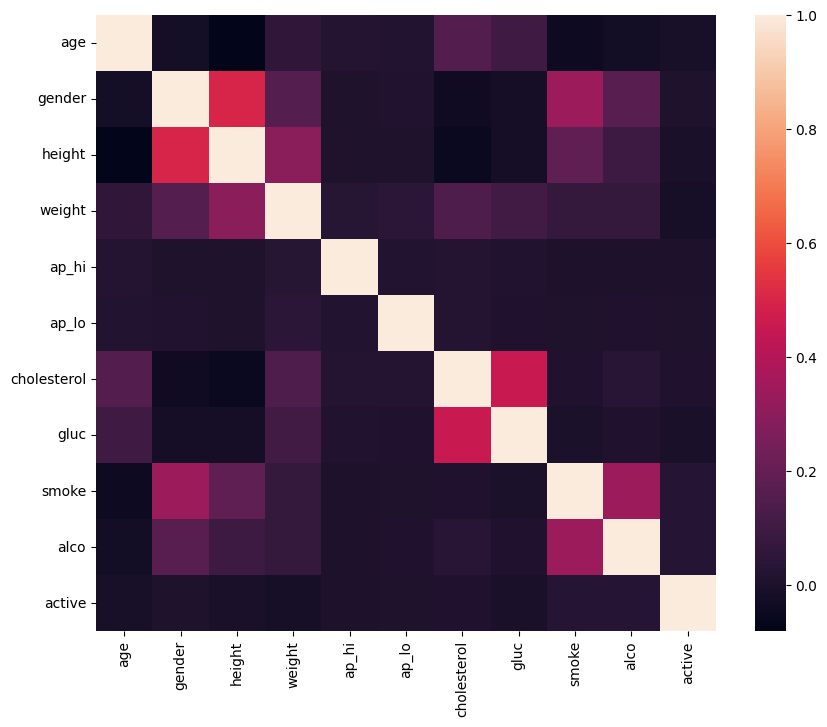

In [ ]:
# correlation_matrix = df.corr()
# plt.figure(figsize = (10,8))
# sns.heatmap(correlation_matrix)
# plt.show()

In [ ]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components = 0.98)
#pca.fit(df)
#reduced = pca.transform(df)
#print(reduced.shape)

In [ ]:
#df=pd.DataFrame(reduced)
#df

In [ ]:
#use svm or random for classification
#use hyper paratemer tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(df, car, test_size=0.1, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from lightgbm import LGBMClassifier
lgr = LGBMClassifier()
rfe = RFE(lgr, n_features_to_select=10)
#pipeline = Pipeline([
#    ('scaler', StandardScaler()),
#    ('rfe', rfe),
#    ('lgr', lgr)
#])
X_train_rfe = rfe.fit_transform(X_train_smote, y_train_smote)
X_test_rfe = rfe.transform(X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_rfe)
X_test_scaled = scaler.transform(X_test_rfe)
lgr.fit(X_train_scaled, y_train_smote)
#lgr.fit(X_train, y_train)
#pipeline.fit(X_train, y_train)
y_predl = lgr.predict(X_test_scaled)
#y_pred5 = pipeline.predict(X_test)
print("Selected Features:", X_train.columns[rfe.support_])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 31519, number of negative: 31519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 721
[LightGBM] [Info] Number of data points in the train set: 63038, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 31519, number of negative: 31519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 63038, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 31519, number of negative: 31519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 752
[LightGBM] [Info] Number of data points in the train set: 63038, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Selected Features: Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'alco', 'active'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
classifier = RandomForestClassifier(n_estimators=200, random_state=42)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy = accuracy_score(y_test, y_predl)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_predl))

Accuracy: 74.80%
              precision    recall  f1-score   support

           0       0.73      0.80      0.76      3502
           1       0.77      0.70      0.74      3498

    accuracy                           0.75      7000
   macro avg       0.75      0.75      0.75      7000
weighted avg       0.75      0.75      0.75      7000



In [ ]:
import torch.nn as nn
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output


class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()




discriminator = Discriminator()

In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
import cv2
import librosa.display
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import soundfile as sf

path_a='/content/drive/MyDrive/h_s/set_a'
path_b='/content/drive/MyDrive/h_s/set_b'
path_a_csv='/content/drive/MyDrive/h_s/set_a.csv'
path_b_csv='/content/drive/MyDrive/h_s/set_b.csv'

In [ ]:
# audio_a={}
# audio_a_labels={}
# audio_b={}
# audio_b_labels={}

# for filename in os.listdir(path_a):
#     if filename.endswith(".wav"):
#         # Use path_a instead of audio_a to build the filepath
#         filepath = os.path.join(path_a, filename)
#         y, sr = librosa.load(filepath, sr=None)
#         audio_a[filename] = (y, sr)

# for filename in os.listdir(path_b):
#     if filename.endswith(".wav"):
#         # Use path_b instead of audio_a to build the filepath
#         filepath = os.path.join(path_b, filename)
#         y, sr = librosa.load(filepath, sr=None)
#         audio_b[filename] = (y, sr)



In [ ]:
data_a=pd.read_csv(path_a_csv)
data_b=pd.read_csv(path_b_csv)
data_cat = pd.concat([data_a, data_b], ignore_index=True)
data_cat["fname"] = data_cat["fname"].str.replace(r"^set_a/|^set_b/", "", regex=True)
data_a.head(5)

,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


In [ ]:
print(data_b['label'].value_counts())
data_b['sublabel'].value_counts()

label
normal        320
murmur         95
extrastole     46
Name: count, dtype: int64


,count
sublabel,
noisynormal,120
noisymurmur,29


In [ ]:
print(data_a['label'].value_counts())
data_a['sublabel'].value_counts()

label
artifact    40
murmur      34
normal      31
extrahls    19
Name: count, dtype: int64


,count
sublabel,


In [ ]:
file_to_label = dict(zip(data_cat["fname"], data_cat["label"]))
unique_labels = sorted(set(data_cat["label"].dropna()))

label_to_index = {label: idx for idx, label in enumerate(unique_labels)}



# Dictionaries to store audio
audio_data, audio_labels, unlabelled_audio = {}, {}, {}

# Process audio files
for path in [path_a, path_b]:
    for filename in os.listdir(path):
        if filename.endswith(".wav"):
            filepath = os.path.join(path, filename)

            # Normalize filename (remove path prefix)
            norm_filename = filename  # Since we already fixed CSV filenames

            # Check if file is unlabelled
            if norm_filename.startswith(("Aunlabelled", "Bunlabelled")) or norm_filename not in file_to_label:
                y, sr = librosa.load(filepath, sr=None)
                unlabelled_audio[norm_filename] = (y, sr)  # Store as unlabelled
                continue  # Skip labelled processing

            # Load labelled audio
            y, sr = librosa.load(filepath, sr=None)
            audio_data[norm_filename] = (y, sr)
            audio_labels[norm_filename] = label_to_index[file_to_label[norm_filename]]


# Function to process audio into mel-spectrogram
def preprocess_audio(audio_dict, labels_dict):
    X, y = [], []
    shapes = []  # Store shapes for debugging

    target_shape = (128, 128)  # Ensure uniform mel-spectrogram size

    for filename, (signal, sr) in audio_dict.items():
        mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

        # Resize spectrogram to fixed shape
        mel_spec_db_resized = cv2.resize(mel_spec_db, target_shape, interpolation=cv2.INTER_AREA)

        shapes.append(mel_spec_db_resized.shape)  # Store shape for debugging

        X.append(mel_spec_db_resized)
        y.append(labels_dict[filename])

    # Check if all shapes are the same after resizing
    unique_shapes = set(shapes)
    if len(unique_shapes) != 1:
        print("Warning: Mel-spectrograms have different shapes even after resizing.")
        print("Unique shapes found:", unique_shapes)
    else:
        print("All spectrograms are now uniform in shape:", unique_shapes)

    X = np.array(X, dtype=np.float32)[..., np.newaxis]  # Add channel dimension
    y = np.array(y, dtype=np.int32)

    return X, y

# Convert labelled audio files to mel-spectrograms
X, y= preprocess_audio(audio_data, audio_labels)
def preprocess_audio_for_gan(audio_dict):
    spectrograms = []
    for filename, (signal, sr) in audio_dict.items():
        mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=64)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

        # Pad or trim mel spectrograms to a fixed length
        fixed_length = 128

        # Pad if mel_spec_db is shorter than fixed_length
        if mel_spec_db.shape[1] < fixed_length:
            padding_needed = fixed_length - mel_spec_db.shape[1]
            mel_spec_db = np.pad(mel_spec_db, ((0, 0), (0, padding_needed)), 'constant')
        # Trim if mel_spec_db is longer than fixed_length
        elif mel_spec_db.shape[1] > fixed_length:
            mel_spec_db = mel_spec_db[:, :fixed_length]

        spectrograms.append(mel_spec_db)

    spectrograms = np.array(spectrograms)
    spectrograms = (spectrograms - spectrograms.min()) / (spectrograms.max() - spectrograms.min())  # Normalize
    spectrograms = np.expand_dims(spectrograms, axis=-1)  # Add channel dimension
    return spectrograms

# Prepare training data
X_gan = preprocess_audio_for_gan(audio_data)

All spectrograms are now uniform in shape: {(128, 128)}


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

def build_generator(latent_dim):
    model = keras.Sequential([
        layers.Input(shape=(latent_dim,)),

        # Project and reshape
        layers.Dense(16 * 32 * 128, use_bias=False),  # 16 height × 32 width × 128 filters
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Reshape((16, 32, 128)),

        # Upsample to (32, 64, 64)
        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        # Upsample to (64, 128, 1)
        layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', activation='tanh')
    ])
    return model

latent_dim = 100
generator = build_generator(latent_dim)

def build_discriminator(input_shape=(64, 128, 1)):
    model = keras.Sequential([
        layers.Input(shape=input_shape),

        layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(0.2),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(0.2),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(1, activation="sigmoid")
    ])
    return model

# Build and compile the discriminator
discriminator = build_discriminator(X_gan.shape[1:])

discriminator.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    metrics=["accuracy"])
discriminator.trainable = False

gan_input = layers.Input(shape=(latent_dim,))
generated_spectrogram = generator(gan_input)
gan_output = discriminator(generated_spectrogram)

gan = keras.Model(gan_input, gan_output)
gan.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(0.0002))

In [ ]:
def train_gan(generator, discriminator, gan, dataset, latent_dim, epochs=2000, batch_size=32):
    half_batch = batch_size // 2

    for epoch in range(epochs):
        # Select real spectrograms
        idx = np.random.randint(0, dataset.shape[0], half_batch)
        real_spectrograms = dataset[idx]
        real_labels = np.ones((half_batch, 1))

        # Generate fake spectrograms
        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        fake_spectrograms = generator.predict(noise)
        fake_labels = np.zeros((half_batch, 1))

        # Train Discriminator
        d_loss_real = discriminator.train_on_batch(real_spectrograms, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_spectrograms, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)

        # Print progress
        if epoch % 500 == 0:
            print(f"Epoch {epoch}: D Loss={d_loss[0]}, G Loss={g_loss}")

train_gan(generator, discriminator, gan, X_gan, latent_dim)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0: D Loss=0.6647861003875732, G Loss=0.682357668876648
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [ ]:
num_synthetic_samples = 500  # Number of samples to generate

noise = np.random.normal(0, 1, (num_synthetic_samples, latent_dim))
synthetic_spectrograms = generator.predict(noise)
synthetic_spectrograms = tf.image.resize(synthetic_spectrograms, (X_train.shape[1], X_train.shape[2])).numpy()



# Combine with real data
X_train_augmented = np.concatenate((X_train, synthetic_spectrograms), axis=0)
y_train_augmented = np.concatenate((y_train, np.random.choice(y_train, num_synthetic_samples)), axis=0)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step


In [ ]:
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import LayerNormalization
input_layer = layers.Input(shape=X_train.shape[1:])  # (64, 128, 1) shape

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)  # -> (32, 64, 32)

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)  # -> (16, 32, 64)

# Reshape for LSTM
x = layers.Reshape((x.shape[2], x.shape[1] * x.shape[3]))(x)  # (32, 16*64)

# Bidirectional LSTM Stack
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)
x = layers.LayerNormalization()(x)

x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)
x = layers.LayerNormalization()(x)

x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.LayerNormalization()(x)

x = layers.GlobalMaxPooling1D()(x)

x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)

label_output = layers.Dense(len(unique_labels), activation='softmax', name="label_output")(x)



model = models.Model(inputs=input_layer, outputs=label_output)
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0003),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
model.fit(X_train_augmented, y_train_augmented, epochs=20, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.5297 - loss: 1.1229 - val_accuracy: 0.4775 - val_loss: 1.1490
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.4841 - loss: 1.1517 - val_accuracy: 0.5409 - val_loss: 1.0918
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - accuracy: 0.4982 - loss: 1.1119 - val_accuracy: 0.6127 - val_loss: 1.0153
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.5788 - loss: 1.0150 - val_accuracy: 0.5442 - val_loss: 0.9713
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - accuracy: 0.5033 - loss: 1.0710 - val_accuracy: 0.5626 - val_loss: 1.0399
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - accuracy: 0.6306 - loss: 1.0023 - val_accuracy: 0.6260 - val_loss: 0.9046
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - accuracy: 0.6164 - loss: 0.9269 - val_accuracy: 0.7229 - val_loss: 0.8274
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.7048 - loss: 0.8020 - val_accuracy: 0.7563 - val_loss: